In [1]:
import numpy as np

In [2]:
data = np.genfromtxt('data.txt')

In [3]:
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [4]:
data.shape

(100, 2)

In [5]:
def cost_function(b,m,data):
    error = 0
    for _ in range(len(data)):
        x = data[_,0]
        y = data[_,1]
        error += (y - (m*x+b))**2
    return error/float(len(data))

In [6]:
def step_gradient(b_current,m_current,learningRate,data):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(len(data)):
        x = data[i,0]
        y = data[i,1]
        b_gradient += -(2/N) * (y - (m_current * x + b_current))
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate*m_gradient)
    return [new_b,new_m]

In [8]:
def gradient_runner(starting_b,starting_m,iterations,data,learningRate):
    b = starting_b
    m = starting_m
    for i in range(iterations):
        b,m = step_gradient(b,m,learningRate,np.array(data))
    return (b,m)

In [9]:
iterations = 1000
intial_b = 0
intial_m = 0
learningRate = 0.0001
b,m = gradient_runner(intial_b,intial_m,iterations,data,learningRate)
print("The value of b is",b,"and the value of m is",m)

The value of b is 0.08893651993741346 and the value of m is 1.4777440851894448


In [10]:
X = data[:,0].reshape(-1,1)
y = data[:,1]

In [11]:
X.shape

(100, 1)

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel("Amount of Hours Studied")
plt.ylabel("Marks Scored")
plt.show()

<Figure size 640x480 with 1 Axes>

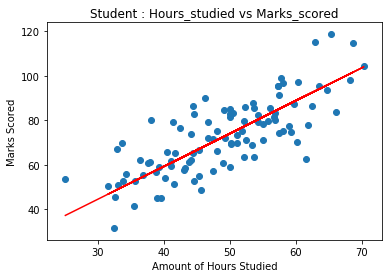

In [14]:
x_vals = np.array(X)
y_vals = m * x_vals + b
plt.plot(x_vals,y_vals,color='red')
plt.xlabel("Amount of Hours Studied")
plt.ylabel("Marks Scored")
plt.title("Student : Hours_studied vs Marks_scored")
plt.scatter(X,y)
plt.savefig("The_best_line.png")
plt.show()